In [1]:
from pathlib import Path
import seaborn as sns
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ff_energy.latex_writer.report import Report
from ff_energy.latex_writer.energydata.energy_data_report import EnergyReport
from ff_energy.latex_writer.figure import Figure
from ff_energy.latex_writer.format import safe_latex_string
from ff_energy.utils.ffe_utils import read_from_pickle, pickle_output

from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import PKL_PATH, PDB_PATH
from ff_energy.ffe.potential import LJ, LJ_bound, DE #, DE_bounds

from ff_energy.ffe.data import pairs_data
from ff_energy.plotting.data_plots import DataPlots


2023-09-14 17:55:25 | DEBUG | __init__:process_initializer_module:72 - Initializing MLIR with module: _site_initialize_0
2023-09-14 17:55:25 | DEBUG | __init__:process_initializer_module:74 - Registering dialects from initializer <module 'jaxlib.mlir._mlir_libs._site_initialize_0' from '/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/jaxlib/mlir/_mlir_libs/_site_initialize_0.so'>


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'H')
4 ('C', 'HGA3')
5 ('C', 'HGP1')
6 ('C', 'HT')
7 ('C', 'OG311')
8 ('C', 'OT')
9 ('CG331', 'CG331')
10 ('CG331', 'CL')
11 ('CG331', 'H')
12 ('CG331', 'HGA3')
13 ('CG331', 'HGP1')
14 ('CG331', 'HT')
15 ('CG331', 'OG311')
16 ('CG331', 'OT')
17 ('CL', 'CL')
18 ('CL', 'H')
19 ('CL', 'HGA3')
20 ('CL', 'HGP1')
21 ('CL', 'HT')
22 ('CL', 'OG311')
23 ('CL', 'OT')
24 ('H', 'H')
25 ('H', 'HGA3')
26 ('H', 'HGP1')
27 ('H', 'HT')
28 ('H', 'OG311')
29 ('H', 'OT')
30 ('HGA3', 'HGA3')
31 ('HGA3', 'HGP1')
32 ('HGA3', 'HT')
33 ('HGA3', 'OG311')
34 ('HGA3', 'OT')
35 ('HGP1', 'HGP1')
36 ('HGP1', 'HT')
37 ('HGP1', 'OG311')
38 ('HGP1', 'OT')
39 ('HT', 'HT')
40 ('HT', 'OG311')
41 ('HT', 'OT')
42 ('OG311', 'OG311')
43 ('OG311', 'OT')
44 ('OT', 'OT')


<Figure size 100x100 with 0 Axes>

In [2]:
# NONBONDED
# OG311    0.0       -0.192   1.765                  ! og MeOH and EtOH 1/06 (was -0.1521 1.7682)
# CG331    0.0       -0.078   2.050   0.0 -0.01 1.9 ! alkane (CT3), 4/98, yin, adm jr; Rmin/2 modified from 2.04 to 2.05
# HGP1     0.0       -0.046    0.225                 ! polar H
# HGA3     0.0       -0.024    1.340                 ! alkane, yin and mackerell, 4/98
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT
# CG321    0.0       -0.0560     2.0100   0.0 -0.01 1.9 ! alkane (CT2), 4/98, yin, adm jr, also used by viv
# CLGA1    0.0       -0.3430     1.9100 ! CLET, DCLE, chloroethane, 1,1-dichloroethane
# HGA2     0.0       -0.0240     1.3400 ! alkane, yin and mackerell, 4/98
# CLA      0.0       -0.150      2.27     ! Chloride
#                    ! D. Beglovd and B. Roux, dA=-83.87+4.46 = -79.40 kcal/mol
# POT      0.0       -0.0870    1.76375   ! Potassium
#                    ! D. Beglovd and B. Roux, dA=-82.36+2.8 = -79.56 kca/mol


In [3]:
test = next(read_from_pickle(PKL_PATH / "ELECp_water_cluster_lj.pkl"))

2023-09-14 17:55:25 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-14 17:55:25 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
2023-09-14 17:55:25 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
2023-09-14 17:55:25 | INFO | xla_bridge:backends:450 - Unable to initialize backend 'plugin': xla_extension has no attributes named get_plugin_device_client. Compile TensorFlow with //tensorflow/compiler/xla/python:enable_plugin_device set to true (defaults to false) to enable this.
2023-09-14 17:55:25 | WARNING | xla_bridge:backends:458 - No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [4]:
test.debug_df

,group,es,akp,idx,gname,distances,sigmas,epsilons,sigmas2,epsilons2,jaxflat
0,0,-0.000928,0,0,test0,4.481767,1.661368,0.35774,1.661368,0.35774,-0.001854
1,0,-0.000928,0,1,test0,4.481767,1.661368,0.35774,1.661368,0.35774,-0.001854
2,0,-0.000481,0,2,test0,5.000412,1.661368,0.35774,1.661368,0.35774,-0.000962
3,0,-0.000481,0,3,test0,5.000412,1.661368,0.35774,1.661368,0.35774,-0.000962
4,0,-0.000347,0,4,test0,5.280160,1.661368,0.35774,1.661368,0.35774,-0.000694
...,...,...,...,...,...,...,...,...,...,...,...
854995,499,-0.000533,2,854995,test99,5.663664,2.608508,0.05602,2.608508,0.05602,-0.001064
854996,499,-0.003140,2,854996,test99,4.206633,2.608508,0.05602,2.608508,0.05602,-0.006189
854997,499,-0.000312,2,854997,test99,6.194226,2.608508,0.05602,2.608508,0.05602,-0.000623
854998,499,-0.000078,2,854998,test99,7.803124,2.608508,0.05602,2.608508,0.05602,-0.000156


In [10]:
test.debug_df["delta_sigma"] =  test.debug_df["sigmas"] - test.debug_df["sigmas2"]  #.describe() #.groupby("gname").sum().describe()

test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]

,group,es,akp,idx,gname,distances,sigmas,epsilons,sigmas2,epsilons2,jaxflat,delta_sigma


In [4]:
test.debug_df["sigmas"].unique()

array([2.13370387, 2.12961322, 2.34124302, 2.12552256, 2.33715237,
       2.54878218])

In [5]:
test.debug_df["epsilons"].unique()

array([0.85692802, 0.84588299, 0.85393354, 0.83498031, 0.8429271 ,
       0.85094952])

In [6]:
test.debug_df["sigmas2"].unique()

array([2.133704 , 2.1296134, 2.341243 , 2.1255226, 2.3371525, 2.548782 ],
      dtype=float32)

In [7]:
test.debug_df["epsilons2"].unique()

array([0.856928  , 0.84588295, 0.8539335 , 0.8349803 , 0.8429271 ,
       0.8509495 ], dtype=float32)

In [8]:
test.

In [29]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons2"].unique()

array([], dtype=float32)

In [30]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas2"].unique()

array([], dtype=float32)

In [31]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["epsilons"].unique()

array([], dtype=float64)

In [32]:
test.debug_df[ test.debug_df["delta_sigma"] > 0.001 ]["sigmas"].unique()

array([], dtype=float64)

In [5]:
# plt.scatter(test.debug_df["es"], test.debug_df["jaxflat"])
# plt.xlim(0,10)
# plt.ylim(0,10)

In [9]:
# plt.scatter(test.debug_df["distances"], test.debug_df["jaxflat"])

In [11]:
# plt.hist(test.debug_df["es"] / test.debug_df["jaxflat"], bins=200000)

In [6]:
test.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,...,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,ELECpol,ELECci,ELECp,ELECm,ELECk,ELECnull,DUMMY
test0,-173.022645,test0,24.14023,-86.50353,20.41138,test0,-1527.133263,test0,20,-1527.276175,...,958362.266640,-958281.958385,-958370.381547,-189.398308,-173.022645,-86.50353,-109.15129,-104.54998,-0.0,0.0
test1,-105.096240,test1,25.25058,-55.44306,8.97296,test1,-1527.135387,test1,20,-1527.221635,...,958360.933743,-958282.584949,-958336.157791,-112.670681,-105.096240,-55.44306,-67.34370,-63.45565,-0.0,0.0
test10,-108.320600,test10,22.55630,-52.42873,8.46527,test10,-1527.152885,test10,20,-1527.237300,...,958349.953526,-958293.673338,-958345.987230,-116.637716,-108.320600,-52.42873,-62.11265,-62.96512,-0.0,0.0
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,...,958357.178250,-958287.528329,-958328.955198,-128.580385,-120.244324,-66.03681,-72.15766,-66.67887,-0.0,0.0
test101,-125.221598,test101,19.42966,-67.62729,15.89952,test101,-1527.160675,test101,20,-1527.249770,...,958345.065616,-958299.378782,-958353.812267,-133.491754,-125.221598,-67.62729,-77.04152,-74.99933,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test95,-123.917572,test95,24.31345,-71.02166,12.12799,test95,-1527.135077,test95,20,-1527.246088,...,958361.127974,-958282.315261,-958351.502253,-135.578897,-123.917572,-71.02166,-83.76700,-76.31560,-0.0,0.0
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,20,-1527.246828,...,958363.336270,-958280.211262,-958351.966386,-178.037113,-163.434955,-78.76038,-97.21214,-93.72871,-0.0,0.0
test97,-132.990408,test97,22.23548,-71.50784,10.84849,test97,-1527.149964,test97,20,-1527.258582,...,958351.786719,-958292.562174,-958359.342081,-145.172647,-132.990408,-71.50784,-82.54423,-79.19230,-0.0,0.0
test98,-114.076388,test98,19.89380,-59.12743,9.63436,test98,-1527.160158,test98,20,-1527.264598,...,958345.389847,-958298.601629,-958363.117026,-123.098129,-114.076388,-59.12743,-74.18664,-73.12057,-0.0,0.0


<AxesSubplot:xlabel='VDW', ylabel='intE'>

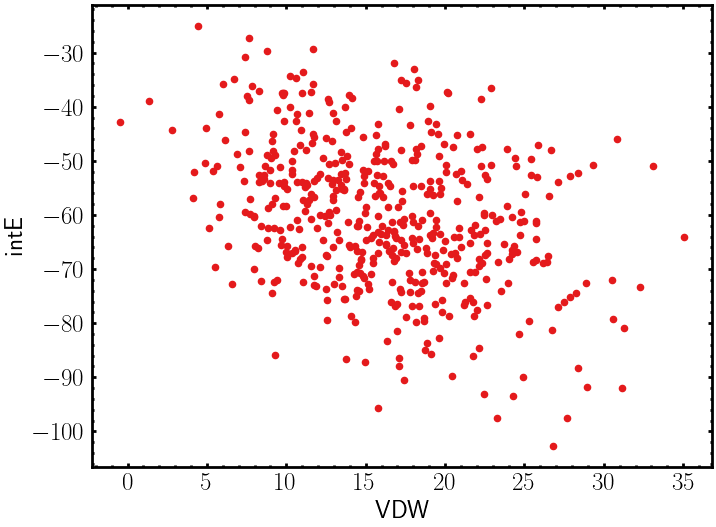

In [7]:
test.data.plot.scatter("VDW", "intE")

In [8]:
parms = [
         0.2245, 1.7682,
        -0.0460,  -0.1521,
        ]

# parms = [
#             2.01, 1.340, 1.9100, 
#         -0.0560, -0.0240 , -0.3430,
#         ]

# parms = [
#             1.340, 2.01, 1.9100, 
#         -0.3430, -0.0560,  -0.0240,

#         ]

# parms = [
#             1.9100, 1.340, 2.01,  
#         -0.0240, -0.3430, -0.0560,  

#         ]

eval_cgenff = test.eval_jax(parms)

In [9]:
eval_cgenff[0]

Array([20.411354  ,  8.972964  ,  8.465277  , 19.454794  , 15.899529  ,
       14.162014  , 10.070152  , 16.801712  , 22.9252    ,  8.256749  ,
       12.653447  ,  8.411     ,  6.3467455 , 20.711582  , 13.125182  ,
       10.658018  , 19.954124  , 20.75681   ,  9.812191  ,  5.7589455 ,
       11.664937  ,  8.809921  , 22.305851  , 16.878206  , 14.560647  ,
       16.813448  , 19.427845  , 20.149302  , 12.647492  , 10.6048565 ,
       14.984079  , 26.50242   , 12.685397  , 15.161553  , 11.530227  ,
       21.555801  , 20.253355  ,  8.272484  , 18.531254  ,  7.40923   ,
       15.773455  ,  8.57979   , 24.925516  , 13.337445  , 18.781054  ,
       18.652212  , 21.546219  , 25.726265  , 14.063948  , 15.316419  ,
       15.484442  , 16.756023  , 16.822807  , 23.238283  , 17.754732  ,
       10.016048  , 23.7352    , 15.481031  , 22.580858  , 27.853735  ,
       14.752148  , 15.178034  , 24.3793    , 18.871853  , 11.693496  ,
       14.048465  , 12.931124  , 15.675693  , 24.219065  , 13.68

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmsy10' (dvi)
2023-09-14 18:58:38 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F1' = b'cmsy10' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = b'cmr17' (dvi)
2023-09-14 18:58:38 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F2' = b'cmr17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F3' = b'cmss17' (dvi)
2023-09-14 18:58:38 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F3' = b'cmss17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr17' from dvi.
2023-09-14 18:58:39 | DEBUG | backend_pdf:writeFonts:913 - Embedding Type-1 font b'cmr17' from dvi.
DEBUG:matplotlib.backends.backend_pdf:Embedding TeX font b'cmr17' - fontinfo={'dvifont': <DviFont: b'cmr17'>, 'pdfname': <Name b'F2'>, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr17.pfb', 'basefont': b'CMR17', 'encodingfile': None, 'effects': {}}
2023-09-1

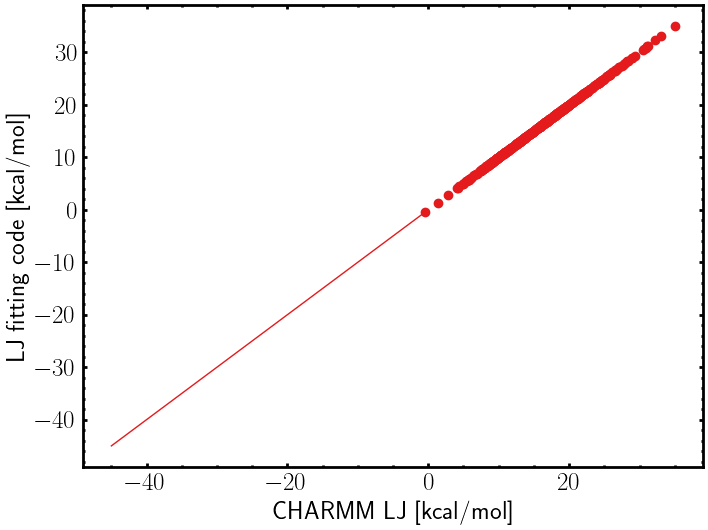

In [12]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

plt.scatter(test.data["VDW"], eval_cgenff[0])
# plt.xlim(-45, 0)
# plt.ylim(-45, 0)
plt.plot([-45, 0], [-45, 0])
plt.ylabel("LJ fitting code [kcal/mol]")
plt.xlabel("CHARMM LJ [kcal/mol]")

np.mean((test.data["VDW"] - eval_cgenff[0])**2)**0.5
plt.savefig("230914_water_cluster_charmm_LJ.pdf", bbox_bounds="tight")

In [13]:
test.dists

KeyboardInterrupt: 

In [11]:
test.data

,ECOL,KEY,TOTAL,ELEC,VDW,KEY,M_ENERGY,KEY,n_monomers,C_ENERGY,...,m_E_tot,p_m_E_tot,C_ENERGY_kcalmol,ELECpol,ELECci,ELECp,ELECm,ELECk,ELECnull,DUMMY
test0,-173.022645,test0,24.14023,-86.50353,20.41138,test0,-1527.133263,test0,20,-1527.276175,...,958362.266640,-958281.958385,-958370.381547,-189.398308,-173.022645,-86.50353,-109.15129,-104.54998,-0.0,0.0
test1,-105.096240,test1,25.25058,-55.44306,8.97296,test1,-1527.135387,test1,20,-1527.221635,...,958360.933743,-958282.584949,-958336.157791,-112.670681,-105.096240,-55.44306,-67.34370,-63.45565,-0.0,0.0
test10,-108.320600,test10,22.55630,-52.42873,8.46527,test10,-1527.152885,test10,20,-1527.237300,...,958349.953526,-958293.673338,-958345.987230,-116.637716,-108.320600,-52.42873,-62.11265,-62.96512,-0.0,0.0
test100,-120.244324,test100,23.76369,-66.03681,19.45476,test100,-1527.141372,test100,20,-1527.210157,...,958357.178250,-958287.528329,-958328.955198,-128.580385,-120.244324,-66.03681,-72.15766,-66.67887,-0.0,0.0
test101,-125.221598,test101,19.42966,-67.62729,15.89952,test101,-1527.160675,test101,20,-1527.249770,...,958345.065616,-958299.378782,-958353.812267,-133.491754,-125.221598,-67.62729,-77.04152,-74.99933,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test95,-123.917572,test95,24.31345,-71.02166,12.12799,test95,-1527.135077,test95,20,-1527.246088,...,958361.127974,-958282.315261,-958351.502253,-135.578897,-123.917572,-71.02166,-83.76700,-76.31560,-0.0,0.0
test96,-163.434955,test96,25.18816,-78.76038,18.10955,test96,-1527.131558,test96,20,-1527.246828,...,958363.336270,-958280.211262,-958351.966386,-178.037113,-163.434955,-78.76038,-97.21214,-93.72871,-0.0,0.0
test97,-132.990408,test97,22.23548,-71.50784,10.84849,test97,-1527.149964,test97,20,-1527.258582,...,958351.786719,-958292.562174,-958359.342081,-145.172647,-132.990408,-71.50784,-82.54423,-79.19230,-0.0,0.0
test98,-114.076388,test98,19.89380,-59.12743,9.63436,test98,-1527.160158,test98,20,-1527.264598,...,958345.389847,-958298.601629,-958363.117026,-123.098129,-114.076388,-59.12743,-74.18664,-73.12057,-0.0,0.0


DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = b'cmsy10' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F1' = b'cmsy10' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F2' = b'cmr17' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F2' = b'cmr17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F3' = b'cmss17' (dvi)
2023-09-14 15:14:24 | DEBUG | backend_pdf:dviFontName:899 - Assigning font /b'F3' = b'cmss17' (dvi)
DEBUG:matplotlib.backends.backend_pdf:Embedding Type-1 font b'cmr17' from dvi.
2023-09-14 15:14:24 | DEBUG | backend_pdf:writeFonts:913 - Embedding Type-1 font b'cmr17' from dvi.
DEBUG:matplotlib.backends.backend_pdf:Embedding TeX font b'cmr17' - fontinfo={'dvifont': <DviFont: b'cmr17'>, 'pdfname': <Name b'F2'>, 'fontfile': '/usr/share/texlive/texmf-dist/fonts/type1/public/amsfonts/cm/cmr17.pfb', 'basefont': b'CMR17', 'encodingfile': None, 'effects': {}}
2023-09-1

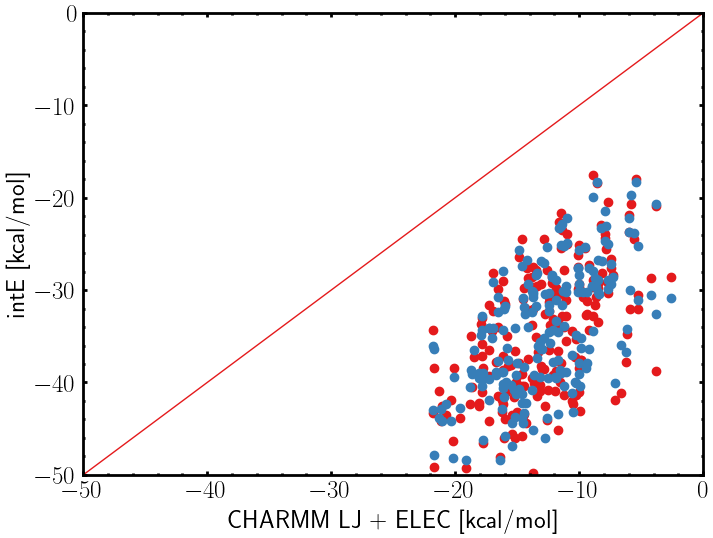

In [117]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

plt.scatter(test.data["intE"] , eval_cgenff[0] + test.data["ELECp"])
plt.scatter(test.data["intE"] , test.data["VDW"] + test.data["ELECp"])

min_lim = -50

plt.xlim(min_lim, 0)
plt.ylim(min_lim, 0)
plt.plot([min_lim, 0], [min_lim, 0])
plt.ylabel("intE [kcal/mol]")
plt.xlabel("CHARMM LJ + ELEC [kcal/mol]")

np.mean((test.data["VDW"] - eval_cgenff[0])**2)**0.5
plt.savefig("230914_dcm_charmm_LJ_ELEC_comparison.pdf", bbox_bounds="tight")

2.117648479205634

In [119]:
# test.out_groups

In [118]:
# plt.plot(list(range(len(test.out_akps))), test.out_akps)

In [49]:
6//3


2

In [50]:
6.0//3

2.0